In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import torch
import os
import tqdm
from PIL import Image
import IPython.display as ipd

In [2]:
df = pd.read_csv('mot_labels.csv')
df.head()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


name          videoName  frameIndex       id  \
0  01c71072-718028b8-0000001.jpg  01c71072-718028b8           0  89537.0   
1  01c71072-718028b8-0000001.jpg  01c71072-718028b8           0  89538.0   
2  01c71072-718028b8-0000001.jpg  01c71072-718028b8           0  89539.0   
3  01c71072-718028b8-0000001.jpg  01c71072-718028b8           0  89540.0   
4  01c71072-718028b8-0000001.jpg  01c71072-718028b8           0  89541.0   

     category attributes.crowd attributes.occluded attributes.truncated  \
0         car            False                True                False   
1         car            False                True                False   
2  pedestrian            False                True                False   
3         car            False               False                False   
4         car            False               False                False   

     box2d.x1     box2d.x2    box2d.y1    box2d.y2  haveVideo  
0  825.173210  1003.094688  355.011547  418.198614       True  
1  484.295612   700.461894  346.697460  424.849885       True  
2  645.588915   663.879908  338.383372  358.337182       True  
3  120.969977   192.471132  359.168591  409.053118       True  
4  251.501155   315.519630  354.180139  400.739030       True

In [3]:
df.shape

(2890846, 13)

In [4]:
df.columns

Index(['name', 'videoName', 'frameIndex', 'id', 'category', 'attributes.crowd',
       'attributes.occluded', 'attributes.truncated', 'box2d.x1', 'box2d.x2',
       'box2d.y1', 'box2d.y2', 'haveVideo'],
      dtype='object')

In [5]:
df.nunique()

name                     278079
videoName                  1400
frameIndex                  263
id                       112819
category                     11
attributes.crowd              2
attributes.occluded           2
attributes.truncated          2
box2d.x1                1109524
box2d.x2                 972595
box2d.y1                 865145
box2d.y2                 737474
haveVideo                     2
dtype: int64

In [6]:
df[df['haveVideo'] == False].nunique()

name                     87610
videoName                  439
frameIndex                 246
id                       36934
category                    11
attributes.crowd             2
attributes.occluded          2
attributes.truncated         2
box2d.x1                491660
box2d.x2                438134
box2d.y1                388573
box2d.y2                339012
haveVideo                    1
dtype: int64

In [7]:
df['category'].value_counts()

car              2207116
pedestrian        381441
truck             149823
bus                57880
bicycle            28477
rider              20365
other vehicle      19202
motorcycle         12464
other person        4453
trailer             4103
train               1592
Name: category, dtype: int64

In [8]:
movie_files = os.listdir('bdd100k_videos_train_00/bdd100k/videos/train')
len(movie_files)

1000

In [9]:
movies_in_df = list(df['videoName'].unique())

In [10]:
movies_given = [s[:-4] for s in movie_files]

In [11]:
movie_mismatch = []
for m in movies_in_df:
    if m not in movies_given:
        movie_mismatch.append(m)
        
movie_mismatch2 = []
for m in movies_given:
    if m not in movies_in_df:
        movie_mismatch2.append(m)

In [12]:
len(movie_mismatch), len(movie_mismatch2)

(439, 39)

In [13]:
movie_mismatch2

['013742f1-3a043a4e',
 '00ca8821-17667a58',
 '0081e3ea-cc69a1c4',
 '0114bdd0-f317da84',
 '022aca7c-9e9a3905',
 '025337f4-9404c4de',
 '02621ea2-399eaeb2',
 '025f49ef-0f6366f3',
 '007eddfc-f8a80310',
 '01c231b4-1ebf841a',
 '00495359-1d04dd8a',
 '025ed087-7cb7665c',
 '028a3713-d915c80e',
 '025b2ded-11363432',
 '025ecc28-3d894af1',
 '00cea101-293a30b5',
 '00e5e793-22614772',
 '0004974f-05e1c285',
 '02065c11-0966f65d',
 '0256f56a-35c8e2fe',
 '025bff9b-cd0b388b',
 '025ce5d9-afedd5c5',
 '0204aad7-4ebd19fa',
 '002f8552-0cdd55c6',
 '025b2ded-47ac9b1d',
 '02b7b9ee-60bfd818',
 '01306b58-1c8ac4c9',
 '025701a5-b1eb8111',
 '0060b445-5acc00ed',
 '025b2ded-0f6cbb6b',
 '02621ea2-e25d54a0',
 '025b2ded-1b0c1607',
 '025b2ded-de608724',
 '02537d58-3972c3e7',
 '0263a45c-d70d9035',
 '0252f2b5-741ac12c',
 '0255fedd-aa5cb7c8',
 '00e100a8-a5e1ece9',
 '0255fedd-d8c148aa']

In [26]:
capture = cv.VideoCapture('bdd100k_videos_train_00/bdd100k/videos/train/010fc651-7cf4bc7d.mov')
ret, img = capture.read()
print(int(capture.get(cv.CAP_PROP_FRAME_COUNT)))
ret, img.shape

1208


(True, (720, 1280, 3))

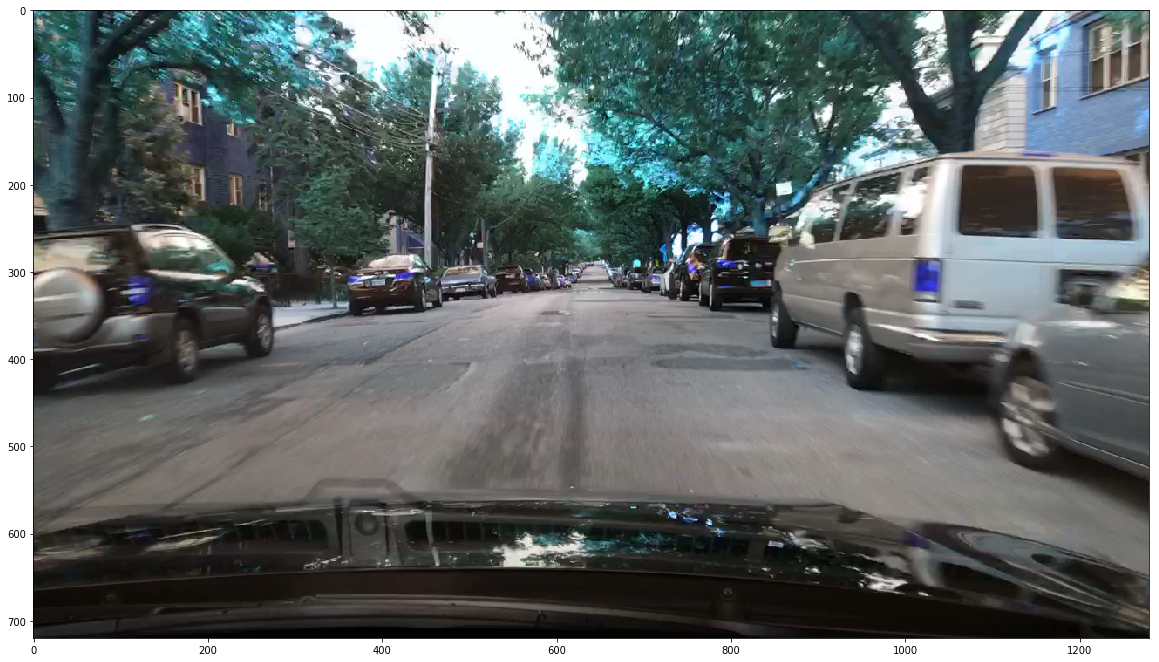

In [27]:
plt.figure(figsize = (20,20))
plt.imshow(img)

In [121]:
df[df['haveVideo'] == True].iloc[498502]

name                    00699de6-58847872-0000095.jpg
videoName                           00699de6-58847872
frameIndex                                         94
id                                              86561
category                                      bicycle
attributes.crowd                                False
attributes.occluded                              True
attributes.truncated                            False
box2d.x1                                      1065.45
box2d.x2                                      1112.43
box2d.y1                                      301.069
box2d.y2                                      331.282
haveVideo                                        True
Name: 741634, dtype: object

In [24]:
og_name = '01c71072-718028b8'
vid_2_name = '01c71072-718028b8' #'00699de6-58847872'#'0252f2b5-1f4c92f2'

In [25]:
test_vid = df[(df['videoName'] == vid_2_name)].copy()
# test_vid["video_frame"] = ((test_vid["frameIndex"]) * (1208/201) + 1).round().astype("int")

In [6]:
test_vid[(test_vid['frameIndex'] == 5) & (test_vid['haveVideo'] == True)] 

name          videoName  frameIndex       id  \
739931  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86433.0   
739932  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86434.0   
739933  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86435.0   
739934  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86436.0   
739935  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86437.0   
739936  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86438.0   
739937  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86439.0   
739938  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86440.0   
739939  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86441.0   
739940  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86442.0   
739941  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86443.0   
739942  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86444.0   
739943  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86445.0   
739944  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86446.0   
739945  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86447.0   
739946  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86451.0   
739947  00699de6-58847872-0000006.jpg  00699de6-58847872           5  86452.0   

          category attributes.crowd attributes.occluded attributes.truncated  \
739931         bus            False               False                 True   
739932         car            False                True                 True   
739933         car            False                True                False   
739934  pedestrian            False               False                False   
739935  pedestrian            False                True                False   
739936  pedestrian            False                True                False   
739937  pedestrian            False                True                False   
739938  pedestrian            False               False                False   
739939  pedestrian            False                True                False   
739940  pedestrian            False                True                False   
739941  pedestrian            False               False                False   
739942  pedestrian            False                True                False   
739943  pedestrian            False                True                False   
739944         car            False                True                False   
739945  pedestrian            False                True                False   
739946  pedestrian            False               False                False   
739947  pedestrian            False                True                False   

          box2d.x1     box2d.x2    box2d.y1    box2d.y2  haveVideo  
739931  831.616153  1279.507790    0.000000  559.560711       True  
739932    0.000000   256.964969  173.096074  387.365543       True  
739933  417.376249   831.195882  150.498074  519.823365       True  
739934  206.643633   262.567415  213.137713  362.552696       True  
739935  260.808959   275.951954  221.204207  286.901508       True  
739936  274.787110   296.569722  226.562495  288.998225       True  
739937  294.007065   306.237945  230.639455  288.881742       True  
739938  298.666448   338.620656  213.283252  290.978468       True  
739939  331.864551   348.405359  233.551570  288.415802       True  
739940  340.018469   359.820847  221.903112  283.989394       True  
739941  364.480232   382.535339  239.958221  289.231199       True  
739942  375.546264   396.513487  229.591092  272.340936       True  
739943  382.535339   403.502562  225.048201  288.066354       True  
739944  824.361340   851.152792  266.400225  294.473005       True  
739945  834.146037   850.453878  240.773619  266.516708       True  
739946  350.735051   392.4365

In [7]:
test_vid[(test_vid['category'] == 'pedestrian') & (test_vid['haveVideo'] == True)]


name          videoName  frameIndex       id  \
739846  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86436.0   
739847  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86437.0   
739848  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86438.0   
739849  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86439.0   
739850  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86440.0   
739851  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86441.0   
739852  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86442.0   
739853  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86443.0   
739854  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86444.0   
739855  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86445.0   
739857  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86447.0   
739858  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86448.0   
739859  00699de6-58847872-0000001.jpg  00699de6-58847872           0  86449.0   
739863  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86436.0   
739864  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86437.0   
739865  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86438.0   
739866  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86439.0   
739867  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86440.0   
739868  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86441.0   
739869  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86442.0   
739870  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86443.0   
739871  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86444.0   
739872  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86445.0   
739874  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86447.0   
739875  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86448.0   
739876  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86449.0   
739877  00699de6-58847872-0000002.jpg  00699de6-58847872           1  86450.0   
739881  00699de6-58847872-0000003.jpg  00699de6-58847872           2  86436.0   
739882  00699de6-58847872-0000003.jpg  00699de6-58847872           2  86437.0   
739883  00699de6-58847872-0000003.jpg  00699de6-58847872           2  86438.0   
...                               ...                ...         ...      ...   
743966  00699de6-58847872-0000200.jpg  00699de6-58847872         199  86734.0   
743971  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86677.0   
743972  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86682.0   
743974  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86690.0   
743975  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86705.0   
743978  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86723.0   
743979  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86725.0   
743980  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86727.0   
743982  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86731.0   
743983  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86732.0   
743984  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86733.0   
743985  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86735.0   
743986  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86736.0   
743987  00699de6-58847872-0000201.jpg  00699de6-58847872         200  86734.0   
743992  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86677.0   
743993  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86682.0   
743995  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86690.0   
743996  00699de6-58847872-0000202.jpg  00699de6-58847872        

In [8]:
test_vid[(test_vid['frameIndex'] == 201)]

name          videoName  frameIndex       id  \
743989  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86491.0   
743990  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86617.0   
743991  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86672.0   
743992  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86677.0   
743993  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86682.0   
743994  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86688.0   
743995  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86690.0   
743996  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86705.0   
743997  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86716.0   
743998  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86723.0   
743999  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86725.0   
744000  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86727.0   
744001  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86728.0   
744002  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86731.0   
744003  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86732.0   
744004  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86733.0   
744005  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86735.0   
744006  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86737.0   
744007  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86738.0   
744008  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86661.0   
744009  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86739.0   
744010  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86740.0   
744011  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86741.0   
744012  00699de6-58847872-0000202.jpg  00699de6-58847872         201  86697.0   

          category attributes.crowd attributes.occluded attributes.truncated  \
743989         bus            False                True                False   
743990         car            False               False                False   
743991       rider            False                True                False   
743992  pedestrian            False                True                False   
743993  pedestrian            False                True                False   
743994         car            False                True                False   
743995  pedestrian            False                True                False   
743996  pedestrian            False                True                False   
743997         car            False                True                False   
743998  pedestrian            False                True                False   
743999  pedestrian            False                True                False   
744000  pedestrian            False                True                False   
744001         car            False               False                False   
744002  pedestrian            False                True                False   
744003  pedestrian            False                True                False   
744004  pedestrian            False                True                False   
744005  pedestrian            False                True                False   
744006  pedestrian            False                True                False   
744007  pedestrian            False                True                False   
744008         bus            False                True                False   
744009  pedestrian            False                True                False   
744010  pedestrian            False                True                False   
744011  pedestrian            False                True                False   
744012     bicycle            False                True                False   

      

In [9]:
test_vid['frameIndex'].max()

201

In [10]:
ipd.Video(f'bdd100k_videos_train_00/bdd100k/videos/train/{vid_2_name}.mov', width=700)

In [16]:
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")
    plt.show()

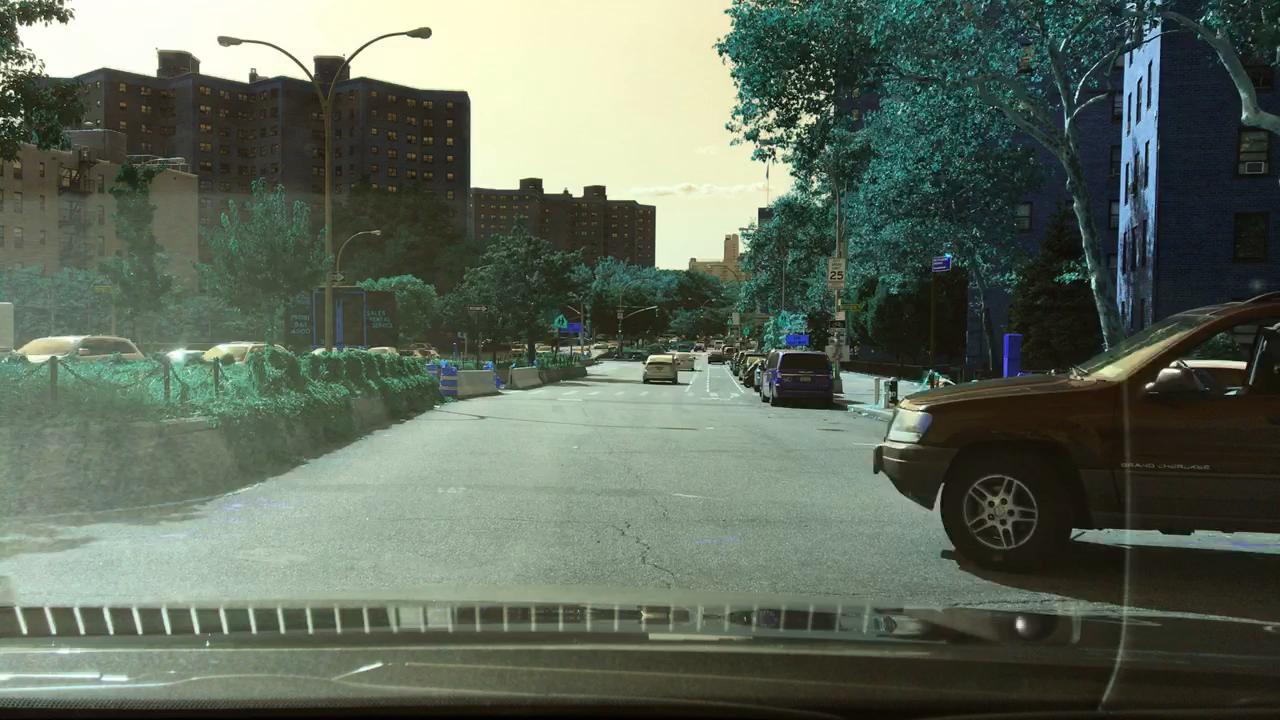

In [12]:
img = Image.open("frames/01c71072-718028b8-0000202.jpg")
img

In [13]:
color_map = {
    "car": (0, 0, 255),
    "truck": (0, 0, 100),
    "pedestrian": (255, 0, 0),
    "other vehicle": (0, 0, 150),
    "rider": (200, 100, 0),
    "bicycle": (0, 255, 0),
    "other person": (200, 0, 0),
    "trailer": (0, 150, 150),
    "motorcycle": (0, 150, 0),
    "bus": (0, 0, 100),
}

In [14]:
np.arange(0, 1208, 6)

array([   0,    6,   12,   18,   24,   30,   36,   42,   48,   54,   60,
         66,   72,   78,   84,   90,   96,  102,  108,  114,  120,  126,
        132,  138,  144,  150,  156,  162,  168,  174,  180,  186,  192,
        198,  204,  210,  216,  222,  228,  234,  240,  246,  252,  258,
        264,  270,  276,  282,  288,  294,  300,  306,  312,  318,  324,
        330,  336,  342,  348,  354,  360,  366,  372,  378,  384,  390,
        396,  402,  408,  414,  420,  426,  432,  438,  444,  450,  456,
        462,  468,  474,  480,  486,  492,  498,  504,  510,  516,  522,
        528,  534,  540,  546,  552,  558,  564,  570,  576,  582,  588,
        594,  600,  606,  612,  618,  624,  630,  636,  642,  648,  654,
        660,  666,  672,  678,  684,  690,  696,  702,  708,  714,  720,
        726,  732,  738,  744,  750,  756,  762,  768,  774,  780,  786,
        792,  798,  804,  810,  816,  822,  828,  834,  840,  846,  852,
        858,  864,  870,  876,  882,  888,  894,  9

In [52]:
list(df[df['haveVideo'] == True]['videoName'].drop_duplicates())[:20]

['01c71072-718028b8',
 '0252f2b5-1f4c92f2',
 '0153f03b-8fbdc1ad',
 '011f8481-b14725fa',
 '0153f03b-3b26c404',
 '01118704-e91b1b1c',
 '006a7635-c42f9f97',
 '00d1bafa-1b47b41c',
 '00207869-046fa443',
 '01853f47-6975b587',
 '024ac038-ffa0ed50',
 '01c88f41-3ddab5b5',
 '01ca43f9-d9cae3f4',
 '01a4deab-fd589c6f',
 '00ce8219-d0b5582e',
 '0231c6df-b84bd28f',
 '02995fe4-158af38b',
 '01ff9753-487eb0bd',
 '00f89335-2ef7949d',
 '00067cfb-5adfaaa7']

In [59]:
nums = np.arange(1191, 0, -6)
len(nums), nums

(199, array([1191, 1185, 1179, 1173, 1167, 1161, 1155, 1149, 1143, 1137, 1131,
        1125, 1119, 1113, 1107, 1101, 1095, 1089, 1083, 1077, 1071, 1065,
        1059, 1053, 1047, 1041, 1035, 1029, 1023, 1017, 1011, 1005,  999,
         993,  987,  981,  975,  969,  963,  957,  951,  945,  939,  933,
         927,  921,  915,  909,  903,  897,  891,  885,  879,  873,  867,
         861,  855,  849,  843,  837,  831,  825,  819,  813,  807,  801,
         795,  789,  783,  777,  771,  765,  759,  753,  747,  741,  735,
         729,  723,  717,  711,  705,  699,  693,  687,  681,  675,  669,
         663,  657,  651,  645,  639,  633,  627,  621,  615,  609,  603,
         597,  591,  585,  579,  573,  567,  561,  555,  549,  543,  537,
         531,  525,  519,  513,  507,  501,  495,  489,  483,  477,  471,
         465,  459,  453,  447,  441,  435,  429,  423,  417,  411,  405,
         399,  393,  387,  381,  375,  369,  363,  357,  351,  345,  339,
         333,  327,  321,  315,  

In [65]:
df[(df['haveVideo']==True) &(df['frameIndex'] > 203)]['videoName'].drop_duplicates()

613640     0051e391-d32a618e
813201     012a9c41-9423165c
1380580    00fcfec9-8accd82b
1476159    00091078-cedbfea7
1512540    01c5cd64-192464e1
1837207    00054602-3bf57337
2616879    007aeb45-c601742b
Name: videoName, dtype: object

211
1260
5.966824644549763 5
5


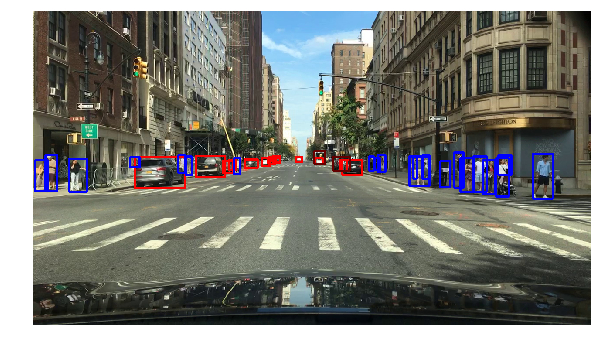

11


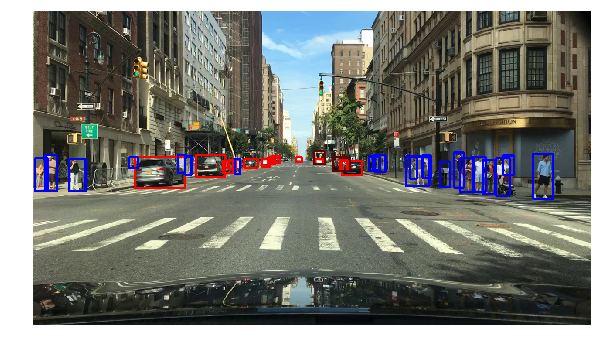

17


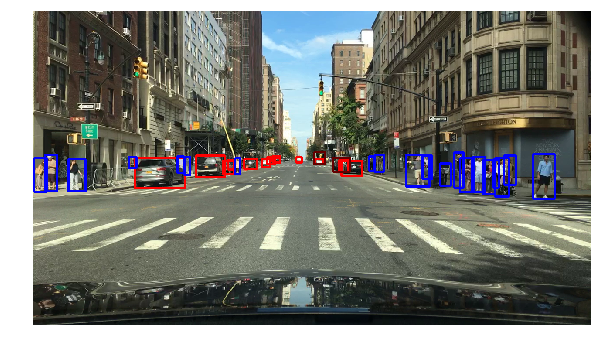

23


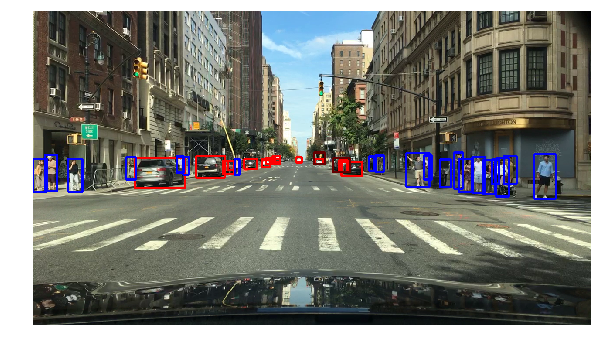

29


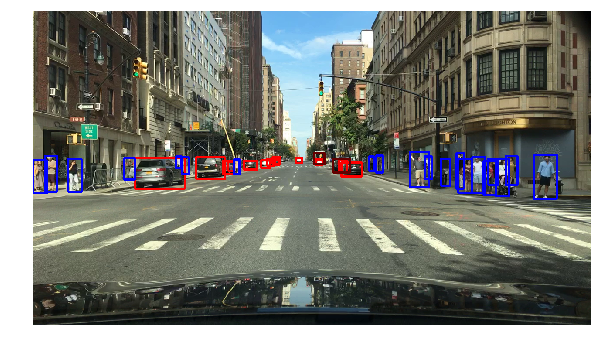

35


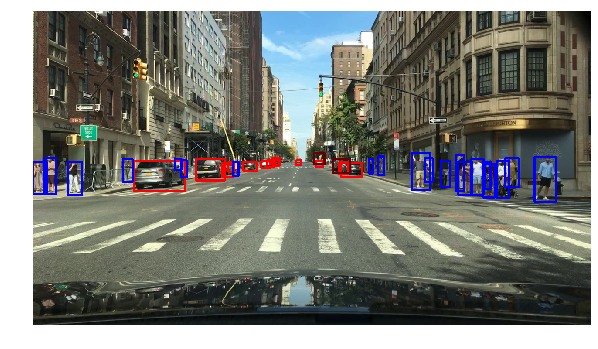

41


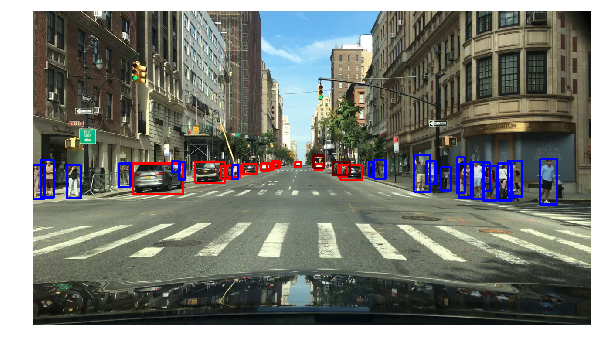

47


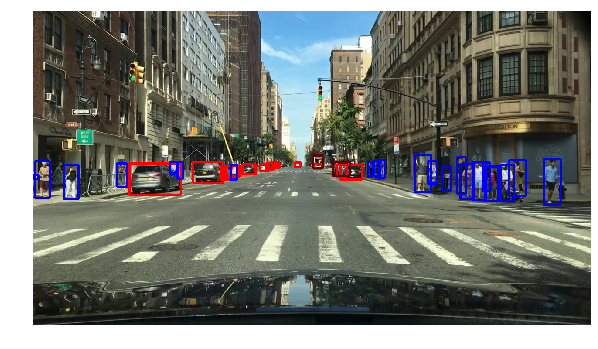

In [69]:
vid_2_name = '007aeb45-c601742b' #'00067cfb-5adfaaa7' #'00f89335-2ef7949d' #'00ce8219-d0b5582e' #'01c88f41-3ddab5b5' #'01a4deab-fd589c6f' #'006a7635-c42f9f97' #'01118704-e91b1b1c' #'00699de6-58847872'#'0252f2b5-1f4c92f2' #'01c71072-718028b8'

test_vid = df[(df['videoName'] == vid_2_name)].copy()
df_frame_max = test_vid['frameIndex'].max()
print(df_frame_max)

capture = cv.VideoCapture(f'bdd100k_videos_train_00/bdd100k/videos/train/{vid_2_name}.mov')
vid_frame_max = int(capture.get(cv.CAP_PROP_FRAME_COUNT))
print(vid_frame_max)
print((vid_frame_max-1)/df_frame_max, (vid_frame_max-1)%6)
mod_val = (vid_frame_max-1)%6
for i in range(int(capture.get(cv.CAP_PROP_FRAME_COUNT))):
    ret, img = capture.read()
    if i % 6 == mod_val and i < 50:  #i % 6 == 1:
        print(i)
        img_example = img.copy()
        frame_labels = test_vid[(test_vid['frameIndex'] == int(i / 6) + 1)] #video_labels.query('video_frame == 1035')
        for i, d in frame_labels.iterrows():
            pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
            pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
            color = color_map[d['category']]
            cv.rectangle(img_example, pt1, pt2, color, 3)
        display_cv2_img(img_example)
#     if i == 0 or i == 5 or i == 6:
#         print(i)
#         img_example = img.copy()
#         frame_labels = test_vid[(test_vid['frameIndex'] == 0)] #video_labels.query('video_frame == 1035')
#         for i, d in frame_labels.iterrows():
#             pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
#             pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
#             color = color_map[d['category']]
#             cv.rectangle(img_example, pt1, pt2, color, 3)
#         display_cv2_img(img_example)
#     if i == 5 or i == 31:
#         print(i)
#         img_example = img.copy()
#         frame_labels = test_vid[(test_vid['frameIndex'] == 5)] #video_labels.query('video_frame == 1035')
#         for i, d in frame_labels.iterrows():
#             pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
#             pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
#             color = color_map[d['category']]
#             cv.rectangle(img_example, pt1, pt2, color, 3)
#         display_cv2_img(img_example)
#     if i == 201 or i == 1206 or i == 1207: #i == 5 or i == 60:
#         print(i)
#         img_example = img.copy()
#         frame_labels = test_vid[(test_vid['frameIndex'] == 201)] #video_labels.query('video_frame == 1035')
#         for i, d in frame_labels.iterrows():
#             pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
#             pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
#             color = color_map[d['category']]
#             cv.rectangle(img_example, pt1, pt2, color, 3)
#         display_cv2_img(img_example)
#         plt.figure(figsize = (20,20))
#         plt.imshow(img)

In [71]:
test_vid2 = df[(df['videoName'] == '01c71072-718028b8')].copy()
test_vid2["video_frame"] = (test_vid2["frameIndex"] * (11.9)).round().astype("int")

In [72]:
df[(df['videoName'] == '010fc651-7cf4bc7d') & (df['frameIndex'] == 0)]

name          videoName  frameIndex  \
1588272  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588273  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588274  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588275  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588276  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588277  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588278  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588279  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588280  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588281  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588282  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588283  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588284  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588285  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   
1588286  010fc651-7cf4bc7d-0000001.jpg  010fc651-7cf4bc7d           0   

              id category attributes.crowd attributes.occluded  \
1588272  62056.0      car            False               False   
1588273  62057.0      car            False               False   
1588274  62058.0      car            False                True   
1588275  62059.0      car            False               False   
1588276  62060.0      car            False                True   
1588277  62061.0      car            False                True   
1588278  62062.0      car            False                True   
1588279  62063.0      car            False                True   
1588280  62064.0      car            False                True   
1588281  62065.0      car            False                True   
1588282  62066.0      car            False                True   
1588283  62067.0      car            False                True   
1588284  62068.0      car            False                True   
1588285  62069.0      car             True                True   
1588286  62070.0      car             True                True   

        attributes.truncated     box2d.x1     box2d.x2    box2d.y1  \
1588272                 True     0.868385   278.751696  241.845319   
1588273                 True  1095.892514  1280.000000  280.922659   
1588274                 True   842.333786  1280.000000  162.822252   
1588275                False   358.643148   469.796472  277.449118   
1588276                False   240.542741   279.620081  274.843962   
1588277                False   761.573948   859.701493  255.739484   
1588278                False   466.280600   531.947270  291.343284   
1588279                False   729.419702   781.546811  267.028494   
1588280                False   530.530003   570.529172  290.539583   
1588281                False   719.891452   736.390773  287.869742   
1588282                False   702.019221   726.838535  293.080054   
1588283                False   562.713704   579.213026  294.816825   
1588284                False   680.814111   703.436487  294.816825   
1588285                False   577.358458   637.769817  286.285166   
1588286                False   654.191117   682.029037  289.625717   

           box2d.y2  haveVideo  
1588272  444.179104       True  
1588273  547.255278       True  
1588274  440.705563       True  
1588275  349.525102       True  
1588276  305.237449       True  
1588277  346.051560       True  
1588278  333.529993       True  
1588279  333.057571       True  
1588280  326.078697       True  
1588281  324.341927       True  
1588282  325.026396       True  
1588283  321.736771       True  
1588284  320.774597       True  
1588285  322.664285       True  
1588286  320.804187       True

In [17]:
df[(df['videoName'] == '010fc651-7cf4bc7d')]['frameIndex'].nunique()

202

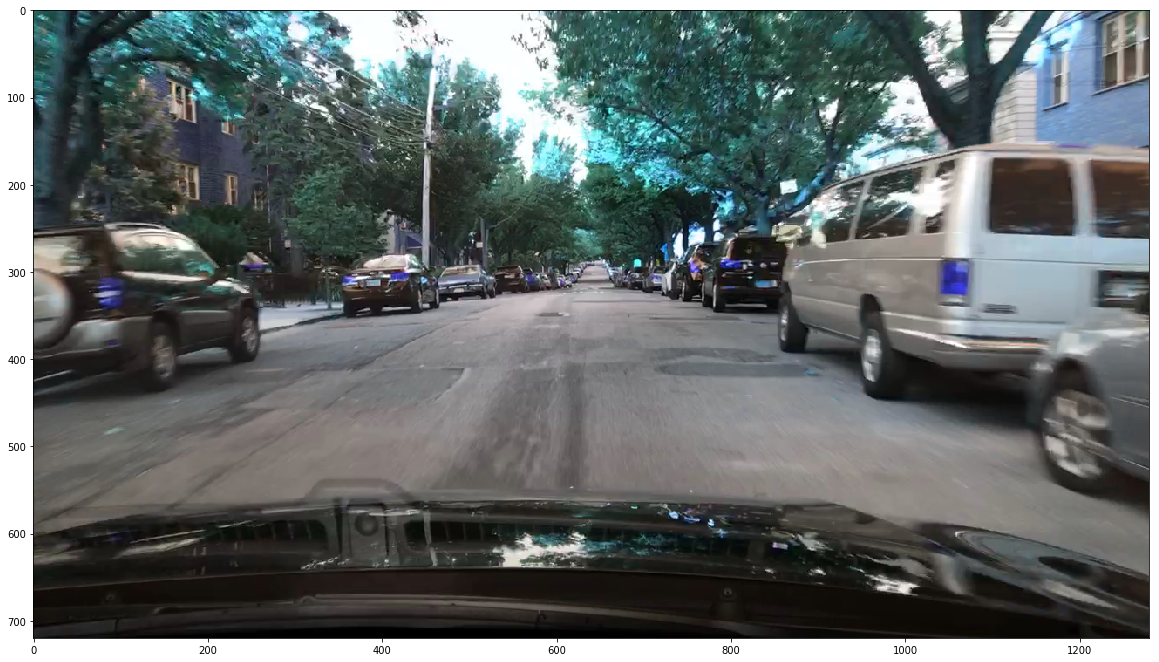

In [18]:
ret, img = capture.read()
plt.figure(figsize = (20,20))
plt.imshow(img)

In [19]:
df[(df['videoName'] == '010fc651-7cf4bc7d') & (df['frameIndex'] == 1)]

name          videoName  frameIndex  \
1588287  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588288  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588289  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588290  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588291  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588292  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588293  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588294  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588295  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588296  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588297  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588298  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588299  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588300  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   
1588301  010fc651-7cf4bc7d-0000002.jpg  010fc651-7cf4bc7d           1   

              id category attributes.crowd attributes.occluded  \
1588287  62056.0      car            False               False   
1588288  62057.0      car            False               False   
1588289  62059.0      car            False               False   
1588290  62058.0      car            False                True   
1588291  62060.0      car            False                True   
1588292  62061.0      car            False                True   
1588293  62062.0      car            False                True   
1588294  62063.0      car            False                True   
1588295  62064.0      car            False                True   
1588296  62065.0      car            False                True   
1588297  62066.0      car            False                True   
1588298  62067.0      car            False                True   
1588299  62068.0      car            False                True   
1588300  62069.0      car             True                True   
1588301  62070.0      car             True                True   

        attributes.truncated     box2d.x1     box2d.x2    box2d.y1  \
1588287                 True     0.000000   260.515604  236.635007   
1588288                 True  1141.058345  1280.000000  306.105834   
1588289                False   352.195626   467.042026  278.317503   
1588290                 True   851.886024  1280.000000  149.796472   
1588291                False   234.960264   274.533824  271.122311   
1588292                False   762.442334   865.099325  255.462243   
1588293                False   463.760700   532.668540  290.337785   
1588294                False   731.663707   789.700760  265.383107   
1588295                False   526.652776   569.310010  290.397325   
1588296                False   722.887381   741.861601  286.957938   
1588297                False   699.608451   724.016282  287.807715   
1588298                False   560.012921   580.526194  293.131763   
1588299                False   680.369821   705.512606  292.638906   
1588300                False   577.358458   639.531861  282.944616   
1588301                False   654.191117   685.926345  286.841925   

           box2d.y2  haveVideo  
1588287  445.047490       True  
1588288  569.226594       True  
1588289  353.289401       True  
1588290  450.257802       True  
1588291  310.695871       True  
1588292  347.788331       True  
1588293  334.695222       True  
1588294  334.829154       True  
1588295  326.491908       True  
1588296  331.158752       True  
1588297  323.132390       True  
1588298  324.574908       True  
1588299  322.463791       True  
1588300  322.044252       True  
1588301  320.804187       True

In [21]:
# movie_files = os.listdir('bdd100k_videos_train_00/bdd100k/videos/train')
# movies_in_df = list(df['videoName'].unique())
# movie_files_cleaned = [s[:-4] for s in movie_files]

# frames = {}

# for m in movie_files_cleaned:
#     if m in movies_in_df:
#         capture = cv.VideoCapture(f'bdd100k_videos_train_00/bdd100k/videos/train/{m}.mov')
#         n_frames = df[(df['videoName'] == m)]['frameIndex'].nunique() #int(capture.get(cv.CAP_PROP_FRAME_COUNT))
#         frames[m] = []
#         for frame in range(n_frames):
#             # TODO
#             # add each frame to dict

In [73]:
movie_files = os.listdir('bdd100k_videos_train_00/bdd100k/videos/train')
movies_in_df = list(df['videoName'].unique())
movie_files_cleaned = [s[:-4] for s in movie_files]

In [74]:
'''
save each frame of every video into the folder "frames_v2"
'''

# to keep count of progress of saving frames for all videos into the folder "frames"
numMovies = len(movie_files_cleaned)


# iterate through every video we have saved
for i, m in tqdm.tqdm(enumerate(movie_files_cleaned)):
#     print(f"{i+1} / {numMovies}")
    # if this video is in the dataframe
    if m in movies_in_df:
        # load in the video
        capture = cv.VideoCapture(f'bdd100k_videos_train_00/bdd100k/videos/train/{m}.mov')
        # count number of frames of the video 
        n_frames = int(capture.get(cv.CAP_PROP_FRAME_COUNT)) 
        for frame in range(n_frames):
            ret, img = capture.read()
            if frame % 6 == 1:
                frameNum = int(frame / 6) + 1
                # convert the array into an image:
                img = Image.fromarray(img)


                # if it has reached ned of video --> break
                if ret == False:
                    break
                # otherwise, add it to the folder of frames
                # Save the image to the folder with a new name (if desired)
                # file path:
                path = 'frames_v2/'
                if frameNum+1 < 10:
                    # output_path = os.path.join(path, f'{m}-000000{frame}.jpg')
                    file_name = f'{m}-000000{frameNum+1}.jpg'
                elif frameNum+1 < 100 and frameNum+1 >= 10:
                    # output_path = os.path.join(path, f'{m}-00000{frame}.jpg')
                    file_name = f'{m}-00000{frameNum+1}.jpg'
                elif frameNum+1 < 1000 and frameNum+1 >= 100:
                    # output_path = os.path.join(path, f'{m}-0000{frame}.jpg')
                    file_name = f'{m}-0000{frameNum+1}.jpg'
                # img.save(output_path)
                img.save(os.path.join(path, file_name))


0it [00:00, ?it/s]
1it [00:06,  6.40s/it]
2it [00:14,  6.77s/it]
7it [00:21,  5.21s/it]
8it [00:28,  5.65s/it]
9it [00:35,  6.01s/it]
10it [00:43,  6.56s/it]
11it [00:49,  6.56s/it]
12it [00:56,  6.72s/it]
13it [01:04,  6.93s/it]
14it [01:12,  7.21s/it]
15it [01:19,  7.29s/it]
16it [01:26,  7.03s/it]
17it [01:32,  6.99s/it]
18it [01:40,  7.05s/it]
19it [01:46,  6.94s/it]
20it [01:54,  7.07s/it]
21it [02:01,  7.05s/it]
22it [02:08,  6.98s/it]
23it [02:15,  7.05s/it]
24it [02:22,  7.01s/it]
25it [02:29,  7.24s/it]
26it [02:36,  7.17s/it]
27it [02:44,  7.29s/it]
28it [02:51,  7.14s/it]
29it [02:58,  7.09s/it]
30it [03:05,  7.27s/it]
31it [03:13,  7.49s/it]
33it [03:20,  6.30s/it]
34it [03:27,  6.44s/it]
35it [03:34,  6.65s/it]
37it [03:42,  5.79s/it]
38it [03:50,  6.32s/it]
39it [03:57,  6.63s/it]
40it [04:04,  6.68s/it]
41it [04:11,  6.76s/it]
42it [04:18,  6.83s/it]
43it [04:25,  7.01s/it]
44it [04:32,  7.03s/it]
45it [04:40,  7.16s/it]
46it [04:47,  7.17s/it]
47it [04:54,  7.28s/it]
4

315it [34:37,  6.58s/it]
316it [34:44,  6.70s/it]
317it [34:52,  6.94s/it]
318it [34:59,  7.00s/it]
319it [35:06,  6.98s/it]
320it [35:13,  7.06s/it]
321it [35:19,  6.67s/it]
322it [35:26,  6.82s/it]
323it [35:32,  6.78s/it]
324it [35:40,  6.89s/it]
325it [35:47,  7.16s/it]
326it [35:55,  7.17s/it]
327it [36:02,  7.24s/it]
328it [36:09,  7.14s/it]
329it [36:16,  7.03s/it]
330it [36:23,  7.00s/it]
331it [36:30,  7.05s/it]
332it [36:37,  7.13s/it]
333it [36:44,  6.93s/it]
334it [36:51,  7.01s/it]
335it [36:58,  7.05s/it]
336it [37:05,  7.10s/it]
337it [37:12,  6.98s/it]
338it [37:19,  6.94s/it]
339it [37:26,  6.93s/it]
340it [37:33,  6.95s/it]
341it [37:39,  6.87s/it]
342it [37:47,  7.12s/it]
343it [37:54,  7.11s/it]
344it [37:58,  6.12s/it]
345it [38:05,  6.36s/it]
346it [38:12,  6.69s/it]
347it [38:19,  6.85s/it]
348it [38:27,  6.99s/it]
349it [38:34,  6.94s/it]
350it [38:37,  5.98s/it]
351it [38:45,  6.46s/it]
352it [38:52,  6.56s/it]
353it [38:59,  6.79s/it]
354it [39:06,  6.86s/it]


610it [1:08:00,  7.06s/it]
611it [1:08:07,  7.01s/it]
612it [1:08:14,  7.05s/it]
613it [1:08:21,  6.86s/it]
614it [1:08:28,  6.84s/it]
615it [1:08:34,  6.72s/it]
616it [1:08:42,  6.96s/it]
617it [1:08:49,  7.09s/it]
618it [1:08:53,  6.04s/it]
619it [1:09:00,  6.34s/it]
620it [1:09:07,  6.55s/it]
621it [1:09:14,  6.74s/it]
622it [1:09:21,  6.75s/it]
623it [1:09:28,  6.81s/it]
624it [1:09:35,  7.04s/it]
625it [1:09:42,  7.01s/it]
626it [1:09:49,  6.91s/it]
627it [1:09:56,  6.98s/it]
628it [1:10:03,  7.08s/it]
629it [1:10:11,  7.23s/it]
630it [1:10:18,  7.27s/it]
631it [1:10:25,  7.10s/it]
632it [1:10:32,  7.17s/it]
633it [1:10:39,  7.05s/it]
634it [1:10:46,  7.14s/it]
635it [1:10:53,  7.04s/it]
636it [1:11:00,  6.88s/it]
637it [1:11:03,  5.88s/it]
638it [1:11:10,  6.06s/it]
639it [1:11:17,  6.51s/it]
640it [1:11:24,  6.71s/it]
641it [1:11:32,  6.92s/it]
642it [1:11:38,  6.82s/it]
643it [1:11:45,  6.83s/it]
644it [1:11:52,  6.91s/it]
645it [1:11:56,  5.86s/it]
646it [1:12:03,  6.16s/it]
6

895it [1:39:30,  6.17s/it]
896it [1:39:37,  6.38s/it]
897it [1:39:44,  6.55s/it]
898it [1:39:51,  6.82s/it]
899it [1:39:58,  6.77s/it]
900it [1:40:05,  6.82s/it]
901it [1:40:12,  7.01s/it]
902it [1:40:19,  7.06s/it]
903it [1:40:27,  7.26s/it]
904it [1:40:34,  7.30s/it]
905it [1:40:42,  7.32s/it]
906it [1:40:49,  7.33s/it]
907it [1:40:56,  7.23s/it]
908it [1:41:03,  7.28s/it]
909it [1:41:11,  7.41s/it]
910it [1:41:15,  6.33s/it]
911it [1:41:22,  6.38s/it]
912it [1:41:28,  6.45s/it]
913it [1:41:35,  6.65s/it]
914it [1:41:42,  6.68s/it]
915it [1:41:49,  6.90s/it]
916it [1:41:57,  7.12s/it]
917it [1:42:04,  6.94s/it]
918it [1:42:11,  7.11s/it]
919it [1:42:18,  7.03s/it]
920it [1:42:26,  7.32s/it]
921it [1:42:33,  7.38s/it]
922it [1:42:40,  7.20s/it]
923it [1:42:47,  7.12s/it]
924it [1:42:54,  7.15s/it]
925it [1:43:01,  7.03s/it]
926it [1:43:08,  6.92s/it]
927it [1:43:15,  6.95s/it]
928it [1:43:21,  6.65s/it]
929it [1:43:27,  6.57s/it]
930it [1:43:34,  6.68s/it]
931it [1:43:41,  6.87s/it]
9

In [28]:
frame_files = os.listdir('frames')

In [33]:
len(frame_files), len(df[df['haveVideo'] == True]['name'].drop_duplicates())

(190469, 190469)